In [12]:
#TRAINING THE MODEL WITH CNN: CONVOLUTIONNAL NEURAL NETWORK
import numpy as np

In [13]:
#chargement de nos données: qui sont des tableaux numpy: numpy array
data = np.load('data.npy') 
target = np.load('target.npy')

In [14]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Activation,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [16]:
# let's have fun !
model = Sequential()
#The first CNN layer followed by Relu and MaxPooling layers: layers = couche
model.add(Conv2D(200, (3,3), input_shape = data.shape[1:]))#conv2D(init, windows_size,input_shape)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#The second CNN layer followed by Relu and MaxPooling layers: layers = couche
model.add(Conv2D(100, (3,3)))#conv2D(init, windows_size,input_shape)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#ajout de la couche flatten pour empiler(sous forme applatit) la 2eme couche 
model.add(Flatten())
model.add(Dropout(0.5))#pour predir l'over-fitting( suppression de 50% de certains neurones)
#Ajout des couches Dense ou Dense layer:
model.add(Dense(50, activation ='relu')) # avec 50 neurones
model.add(Dense(2, activation ='softmax')) #la couche finale with 2output: 2 sorties

In [17]:
#Compilation
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy']
)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test , y_train, y_test = train_test_split(data, target, test_size=0.1)

In [22]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
#entrainement du model
history = model.fit(x_train,y_train , epochs=20 , validation_split=0.2, callbacks = [checkpoint])

Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 2204s 2s/step - loss: 0.7124 - accuracy: 0.5323 - val_loss: 0.6558 - val_accuracy: 0.5323
Epoch 2/20
990/990 [==============================] - 4226s 4s/step - loss: 0.5671 - accuracy: 0.6939 - val_loss: 0.4335 - val_accuracy: 0.8750
Epoch 3/20
990/990 [==============================] - 3046s 3s/step - loss: 0.4440 - accuracy: 0.8101 - val_loss: 0.3114 - val_accuracy: 0.8992
Epoch 4/20
990/990 [==============================] - 2430s 2s/step - loss: 0.2907 - accuracy: 0.8798 - val_loss: 0.2650 - val_accuracy: 0.9234
Epoch 5/20
990/990 [==============================] - 8315s 8s/step - loss: 0.1922 - accuracy: 0.9293 - val_loss: 0.1779 - val_accuracy: 0.9395
Epoch 6/20
990/990 [==============================] - 1786s 2s/step - loss: 0.1447 - accuracy: 0.9465 - val_loss: 0.2396 - val_accuracy: 0.9073
Epoch 7/20
990/990 [==============================] - 1836s 2s/step - loss: 0.1461 - accur

In [23]:
import matplotlib.pyplot as plt

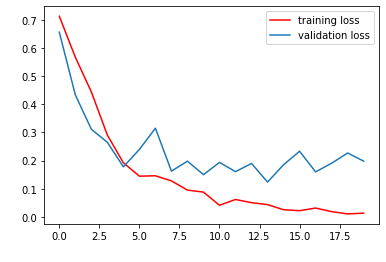

In [27]:
#visualization for loss
plt.plot(history.history['loss'], 'r',label ='training loss')
plt.plot(history.history['val_loss'], label ='validation loss')
plt.xlabel('# epochs', color='white')
plt.ylabel('loss',color ='white')
plt.legend()
plt.show()

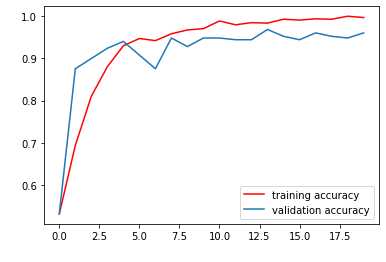

In [28]:
#visualization for accuracy
plt.plot(history.history['accuracy'], 'r',label ='training accuracy')
plt.plot(history.history['val_accuracy'], label ='validation accuracy')
plt.xlabel('# epochs',color ='white')
plt.ylabel('loss',color ='white')
plt.legend()
plt.show()

In [29]:
#evaluation du model
print(model.evaluate(x_test,y_test))

138/138 [==============================] - 118s 858ms/step
[0.1906526548706967, 0.95652174949646]


In [30]:
# Sauvegarde
model.save('model-017.model')